<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/3_Std_dataset_one_Hot_encoding%2C_Correlation%2C_feature_selection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing for machine learning by correlation analysis, feature checking, multicollinearity analysis, simple linear regression, one hot encoding and cleaning and transforming the data in preparation for machine learning

---

# LOAD LIBRARIES

In [1]:

!pip install tensorflow
!pip install scikeras
!pip install scikit-learn
!pip install xgboost
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 21.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import uniform, randint
import warnings

# Suppress user warnings
warnings.filterwarnings('ignore')

# Adjust settings to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
#Import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
import pandas as pd




In [3]:
# Get the files from GitHub raw URLs for the datasets
# dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Datasetv2.csv'
# property_dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Property_data_raw_2.csv'

# Read in the data sets
# dataset = pd.read_csv(dataset_url)
# property_dataset = pd.read_csv(property_dataset_url)

# LOAD DATASET SAVED FROM BLOCK 2

In [4]:

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv3.csv'

# Load the CSV file into a pandas DataFrame called "merged_dataset"
merged_dataset = pd.read_csv(file_path)

# Display information about the DataFrame
print("\nDataset Info:")
merged_dataset.info()  # Information about columns, data types, and memory usage

# Display the shape of the DataFrame
print("\nDataset Shape:")
print(f"Rows: {merged_dataset.shape[0]}, Columns: {merged_dataset.shape[1]}")

Mounted at /content/drive

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   saleable_area(ft^2)  109851 non-null  int64  
 1   unit_rate            109851 non-null  int64  
 2   district             109851 non-null  object 
 3   floor                109851 non-null  float64
 4   CPI                  109851 non-null  int64  
 5   PC                   109851 non-null  int64  
 6   IR                   109851 non-null  int64  
 7   MW                   109851 non-null  int64  
 8   M3                   109851 non-null  int64  
 9   SD                   109851 non-null  int64  
 10  UR                   109851 non-null  int64  
 11  GDP                  109851 non-null  int64  
 12  CI                   109851 non-null  int64  
 13  HSI                  109851 non-null  int64  
 14  LTV                  109851

In [5]:
# Drop the specified columns from the dataset
columns_to_drop = ["price_bucket", "is_outlier", "region_cat", "region_color"]
merged_dataset = merged_dataset.drop(columns=columns_to_drop)

# Display the updated dataset info
print(merged_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   saleable_area(ft^2)  109851 non-null  int64  
 1   unit_rate            109851 non-null  int64  
 2   district             109851 non-null  object 
 3   floor                109851 non-null  float64
 4   CPI                  109851 non-null  int64  
 5   PC                   109851 non-null  int64  
 6   IR                   109851 non-null  int64  
 7   MW                   109851 non-null  int64  
 8   M3                   109851 non-null  int64  
 9   SD                   109851 non-null  int64  
 10  UR                   109851 non-null  int64  
 11  GDP                  109851 non-null  int64  
 12  CI                   109851 non-null  int64  
 13  HSI                  109851 non-null  int64  
 14  LTV                  109851 non-null  int64  
 15  HS               

 # MERGED DATASET SHAPE (AFTER CLEANING BUT BEFORE DECODING)

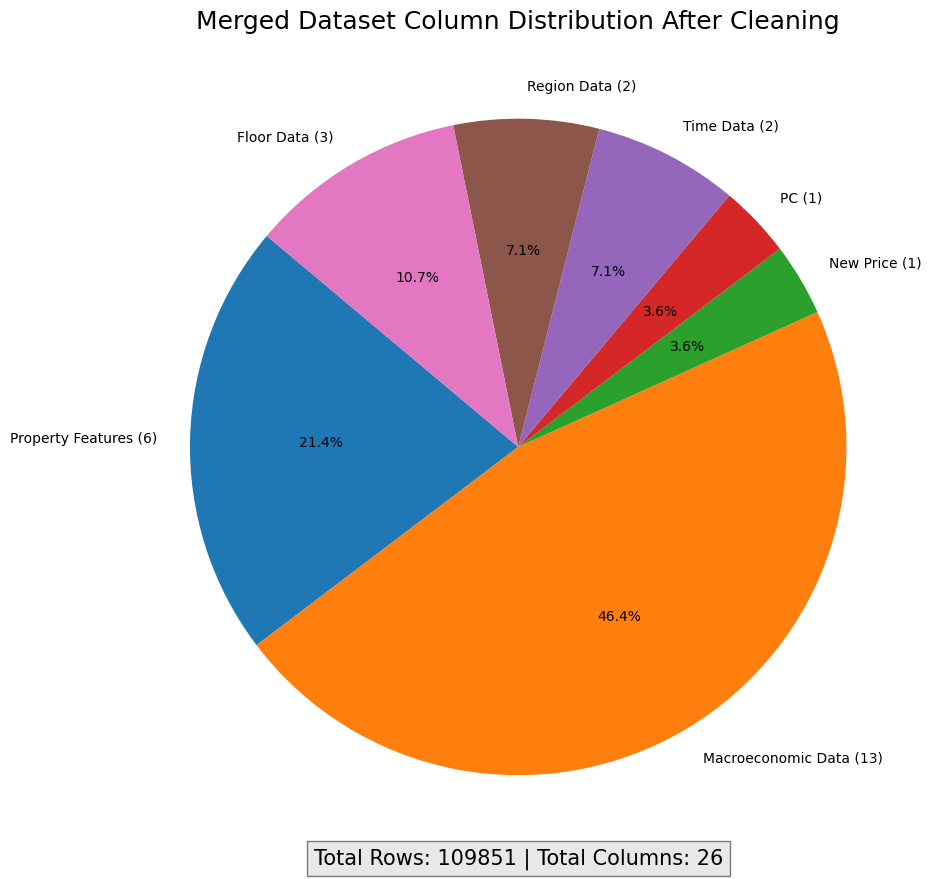

In [6]:
# Haveing a quick lok to make sure everything looks ok for next stage
# Dynamically calculate column groups based on actual features in the dataset
property_features = [col for col in merged_dataset.columns if "area" in col or "unit_rate" in col or "floor" in col]
macroeconomic_data = ["CPI", "IR", "MW", "M3", "SD", "UR", "GDP", "CI", "HSI", "LTV", "HS", "PG", "LS"]
new_price = ["new_price"] if "new_price" in merged_dataset.columns else []
pc = ["PC"] if "PC" in merged_dataset.columns else []
time_data = [col for col in merged_dataset.columns if "YearQuarter" in col or "FormattedDate" in col]
region_data = [col for col in merged_dataset.columns if "district" in col or "region" in col]
floor_data = [col for col in merged_dataset.columns if "floor_height" in col or "floor_size" in col]

# Count the number of columns in each group
groups = {
    "Property Features": len(property_features),
    "Macroeconomic Data": len([col for col in macroeconomic_data if col in merged_dataset.columns]),
    "New Price": len(new_price),
    "PC": len(pc),
    "Time Data": len(time_data),
    "Region Data": len(region_data),
    "Floor Data": len(floor_data)
}

# Calculate totals
total_columns = merged_dataset.shape[1]  # Dynamically get the actual number of columns
total_rows = merged_dataset.shape[0]  # Dynamically get the actual number of rows

# Create the pie chart
plt.figure(figsize=(12.41, 8.78))  # Set the figure size to 50% larger than the original (1.5x A4 size)
colors = plt.cm.tab10.colors  # Use a predefined color palette
plt.pie(
    groups.values(),
    labels=[f"{key} ({value})" for key, value in groups.items()],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title("Merged Dataset Column Distribution After Cleaning", fontsize=18)  # Increase font size by 50%

# Add total rows and columns at the bottom
plt.figtext(
    0.5,
    0.01,
    f"Total Rows: {total_rows} | Total Columns: {total_columns}",
    ha="center",
    fontsize=15,  # Increase font size by 50%
    bbox={"facecolor": "lightgrey", "alpha": 0.5, "pad": 5}
)

# Display the chart
plt.tight_layout()
plt.show()

In [7]:

# Check the data type of the FormattedDate column (debugging as data types changes when saving)
print(merged_dataset['FormattedDate'].dtype)

# Convert FormattedDate to datetime64[ns] format
merged_dataset['FormattedDate'] = pd.to_datetime(merged_dataset['FormattedDate'], errors='coerce')

# After conversion, check the data type again (for confirmation)
print(merged_dataset['FormattedDate'].dtype)

# Check for any rows that couldn't be converted (NaT indicates invalid dates)
invalid_dates = merged_dataset[merged_dataset['FormattedDate'].isna()]
if not invalid_dates.empty:
    print("Invalid dates found during conversion:")
    print(invalid_dates)

object
datetime64[ns]


In [8]:
print(merged_dataset['FormattedDate'].head())
print(merged_dataset['FormattedDate'].dtype)

0   2023-03-08
1   2023-03-08
2   2023-03-08
3   2023-03-08
4   2023-03-08
Name: FormattedDate, dtype: datetime64[ns]
datetime64[ns]


In [9]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI           

# CORRELATION ANALYSIS

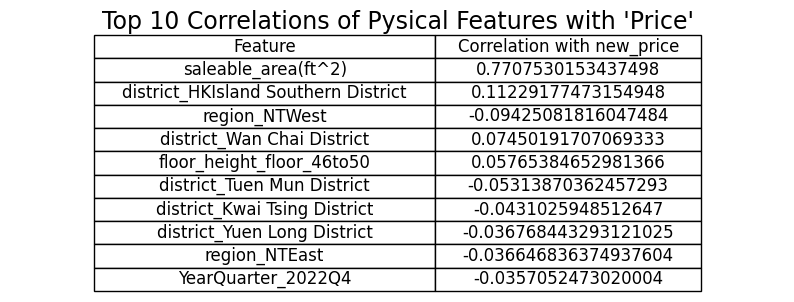

In [10]:
# Step 1: Physical Features
features = ['saleable_area(ft^2)', 'floor_height', 'region', 'district', 'YearQuarter']
target = 'new_price'

# Check if target and features exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Automatically encode categorical features (e.g., 'district', 'YearQuarter')
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 2: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Focus on correlations with `new_price` (excluding `new_price` itself)
        new_price_correlation = correlation_matrix[target].drop(target).sort_values(ascending=False).reset_index()
        new_price_correlation.columns = ['Feature', 'Correlation with new_price']

        # Step 3: Select the top 10 correlations (positive or negative)
        new_price_correlation['Absolute Correlation'] = new_price_correlation['Correlation with new_price'].abs()
        top_10_correlation = new_price_correlation.sort_values(by='Absolute Correlation', ascending=False).head(10)
        top_10_correlation = top_10_correlation[['Feature', 'Correlation with new_price']]  # Keep only relevant columns

        # Step 4: Display correlations with adjusted layout
        import matplotlib.pyplot as plt

        # Create the plot
        fig, ax = plt.subplots(figsize=(10, len(top_10_correlation) * 0.3))  # Adjust figure height for top 10
        ax.axis('off')  # Turn off axes

        # Add the table
        table = ax.table(
            cellText=top_10_correlation.values,
            colLabels=top_10_correlation.columns,
            cellLoc='center',
            loc='center'
        )
        table.auto_set_font_size(False)
        table.set_fontsize(12)  # Increase font size by 25%
        table.scale(1, 1.25)  # Increase line height by 25%
        table.auto_set_column_width(col=list(range(len(top_10_correlation.columns))))

        # Add the title with less space above the table
        plt.title("Top 10 Correlations of Pysical Features with 'Price'", fontsize=17, pad=2)  # Adjusted title

        # Adjust spacing below the table
        plt.subplots_adjust(bottom=0.02)  # Reduced space below the table

        # Show the plot
        plt.show()

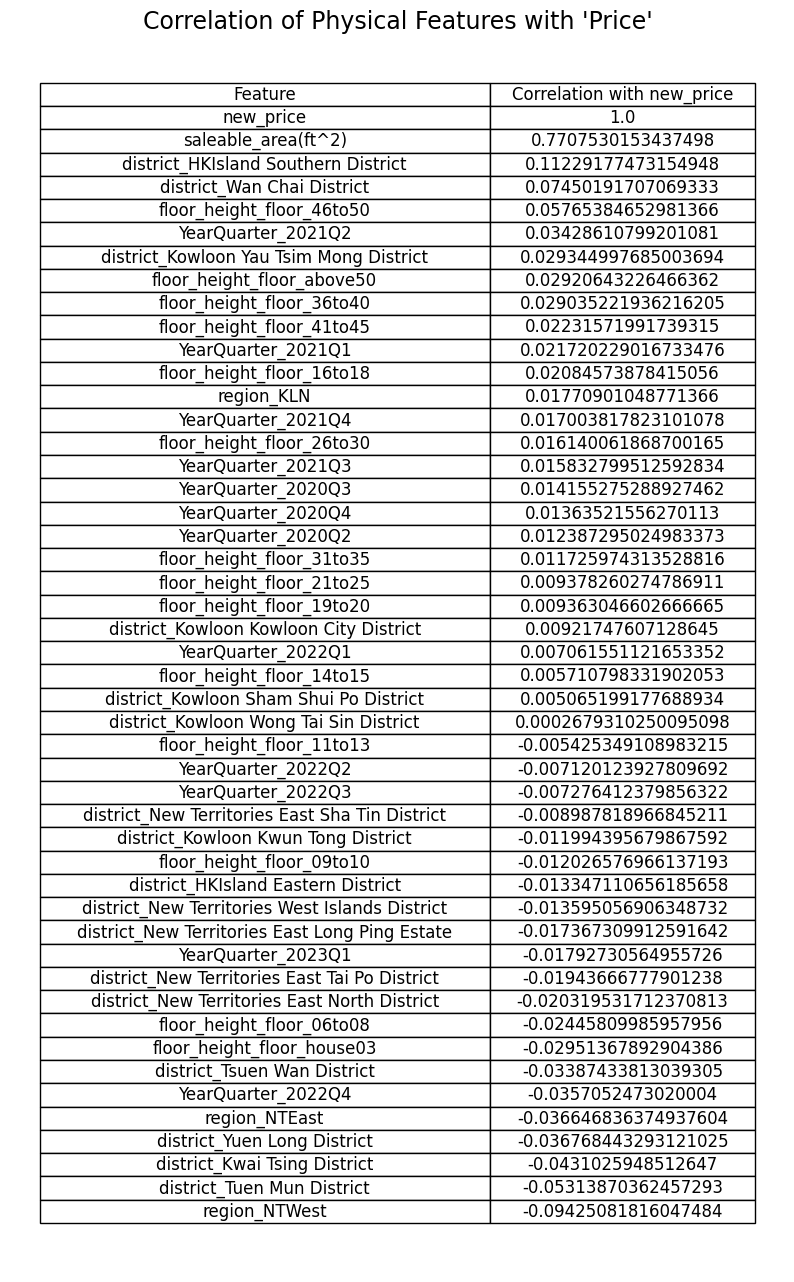

In [11]:
# Step 1: Physical Features
features = ['saleable_area(ft^2)', 'floor_height', 'region', 'district', 'YearQuarter']
target = 'new_price'

# Check if target and features exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Automatically encode categorical features (e.g., 'district', 'YearQuarter')
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 2: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Focus on correlations with `new_price`
        new_price_correlation = correlation_matrix[target].sort_values(ascending=False)
        new_price_correlation = new_price_correlation.reset_index()
        new_price_correlation.columns = ['Feature', 'Correlation with new_price']

        # Step 3: Display correlations as a table with adjusted layout
        import matplotlib.pyplot as plt

        # Create the plot
        fig, ax = plt.subplots(figsize=(10, len(new_price_correlation) * 0.3))  # Adjust figure height
        ax.axis('off')  # Turn off axes

        # Add the table
        table = ax.table(
            cellText=new_price_correlation.values,
            colLabels=new_price_correlation.columns,
            cellLoc='center',
            loc='center'
        )
        table.auto_set_font_size(False)
        table.set_fontsize(12)  # Increase font size by 25%
        table.scale(1, 1.25)  # Increase line height by 25%
        table.auto_set_column_width(col=list(range(len(new_price_correlation.columns))))

        # Add the title with less space above the table
        plt.title("Correlation of Physical Features with 'Price'", fontsize=17, pad=2)  # Increased font size and reduced padding

        # Adjust spacing below the table
        plt.subplots_adjust(bottom=0.02)  # Reduced space below the table

        # Show the plot
        plt.show()

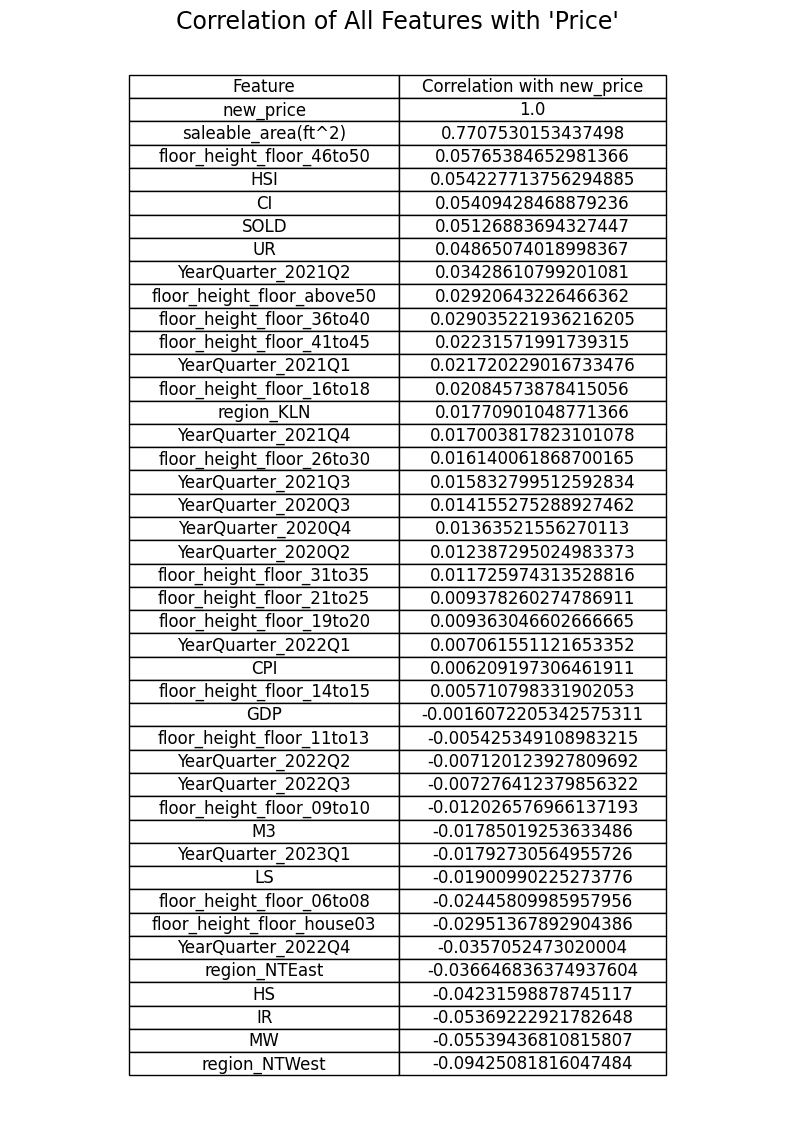

In [12]:
# All features
features = ['saleable_area(ft^2)', 'floor_height', 'region', 'CPI', 'IR', 'MW', 'M3', 'UR', 'GDP', 'CI',
    'HSI', 'HS', 'SOLD', 'LS', 'YearQuarter']
target = 'new_price'

# Check if target and features exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Automatically encode categorical features (e.g., 'district', 'YearQuarter')
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 2: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Focus on correlations with `new_price`
        new_price_correlation = correlation_matrix[target].sort_values(ascending=False)
        new_price_correlation = new_price_correlation.reset_index()
        new_price_correlation.columns = ['Feature', 'Correlation with new_price']

        # Step 3: Display correlations as a table with adjusted layout
        import matplotlib.pyplot as plt

        # Create the plot
        fig, ax = plt.subplots(figsize=(10, len(new_price_correlation) * 0.3))  # Adjust figure height
        ax.axis('off')  # Turn off axes

        # Add the table
        table = ax.table(
            cellText=new_price_correlation.values,
            colLabels=new_price_correlation.columns,
            cellLoc='center',
            loc='center'
        )
        table.auto_set_font_size(False)
        table.set_fontsize(12)  # Increase font size by 25%
        table.scale(1, 1.25)  # Increase line height by 25%
        table.auto_set_column_width(col=list(range(len(new_price_correlation.columns))))

        # Add the title with less space above the table
        plt.title("Correlation of All Features with 'Price'", fontsize=17, pad=2)  # Increased font size and reduced padding

        # Adjust spacing below the table
        plt.subplots_adjust(bottom=0.02)  # Reduced space below the table

        # Show the plot
        plt.show()

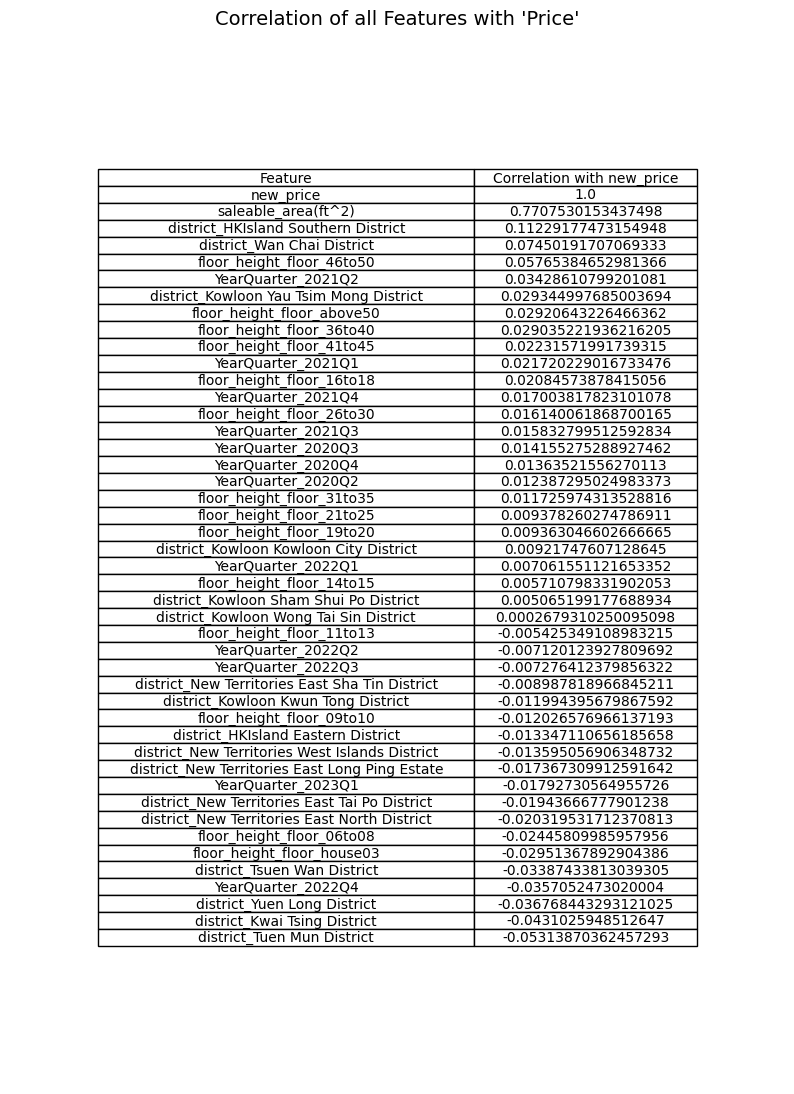

In [13]:
# Step 1: Verify and select relevant columns
features = ['saleable_area(ft^2)', 'floor_height', 'district', 'YearQuarter']
target = 'new_price'

# Check if target and features exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Automatically encode categorical features (e.g., 'district', 'YearQuarter')
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 2: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Focus on correlations with `new_price`
        new_price_correlation = correlation_matrix[target].sort_values(ascending=False)
        new_price_correlation = new_price_correlation.reset_index()
        new_price_correlation.columns = ['Feature', 'Correlation with new_price']

        # Step 3: Display correlations as a table with adjusted layout
        import matplotlib.pyplot as plt

        # Create the plot
        fig, ax = plt.subplots(figsize=(10, len(new_price_correlation) * 0.3))  # Adjust figure height
        ax.axis('off')  # Turn off axes

        # Add the table
        table = ax.table(
            cellText=new_price_correlation.values,
            colLabels=new_price_correlation.columns,
            cellLoc='center',
            loc='center'
        )
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.auto_set_column_width(col=list(range(len(new_price_correlation.columns))))

        # Add the title with less space above the table
        plt.title("Correlation of all Features with 'Price'", fontsize=14, pad=5)  # Reduced padding

        # Adjust spacing below the table
        plt.subplots_adjust(bottom=0.1)  # Adjusts space below the table

        # Show the plot
        plt.show()

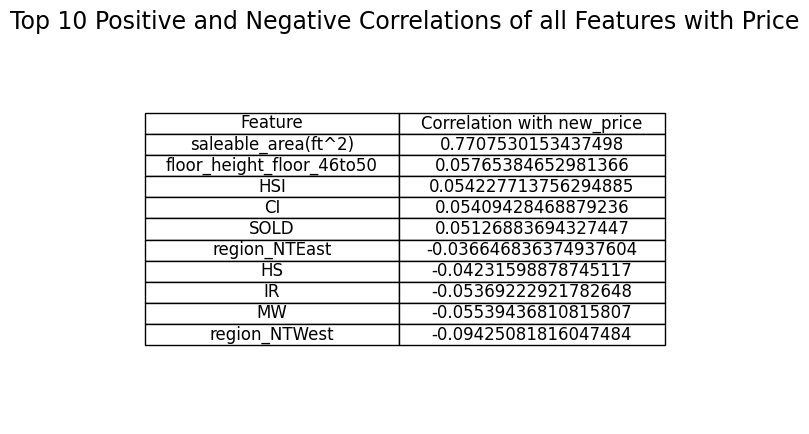

In [14]:
# All features
features = ['saleable_area(ft^2)', 'floor_height', 'region', 'CPI', 'IR', 'MW', 'M3', 'UR', 'GDP', 'CI',
            'HSI', 'HS', 'SOLD', 'LS', 'YearQuarter']
target = 'new_price'

# Check if target and features exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Automatically encode categorical features (e.g., 'district', 'YearQuarter')
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 2: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Focus on correlations with `new_price` (excluding `new_price` itself)
        new_price_correlation = correlation_matrix[target].drop(target).sort_values(ascending=False)
        new_price_correlation = new_price_correlation.reset_index()
        new_price_correlation.columns = ['Feature', 'Correlation with new_price']

        # Step 3: Select the top 10 strongest correlations (positive and negative combined)
        top_5_positive = new_price_correlation.head(5)  # Top 5 positive correlations
        top_5_negative = new_price_correlation.tail(5)  # Top 5 negative correlations
        top_10_combined = pd.concat([top_5_positive, top_5_negative], axis=0)

        # Step 4: Display correlations as a table with adjusted layout
        import matplotlib.pyplot as plt

        # Create the plot
        fig, ax = plt.subplots(figsize=(10, len(top_10_combined) * 0.5))  # Adjust figure height
        ax.axis('off')  # Turn off axes

        # Add the table
        table = ax.table(
            cellText=top_10_combined.values,
            colLabels=top_10_combined.columns,
            cellLoc='center',
            loc='center'
        )
        table.auto_set_font_size(False)
        table.set_fontsize(12)  # Increase font size
        table.scale(1, 1.25)  # Increase line height for better readability
        table.auto_set_column_width(col=list(range(len(top_10_combined.columns))))

        # Add the title (no space between title and table)
        plt.title("Top 10 Positive and Negative Correlations of all Features with Price", fontsize=17, pad=0)

        # Adjust spacing below the table
        plt.subplots_adjust(bottom=0.1)  # Reduced space below the table

        # Show the plot
        plt.show()

Correlation of features with 'PC':
PC      1.000000
CI      0.718973
HSI     0.695772
SOLD    0.684947
UR      0.652564
GDP     0.206487
CPI    -0.082187
LS     -0.404625
M3     -0.472696
HS     -0.618274
MW     -0.753585
IR     -0.928051
Name: PC, dtype: float64


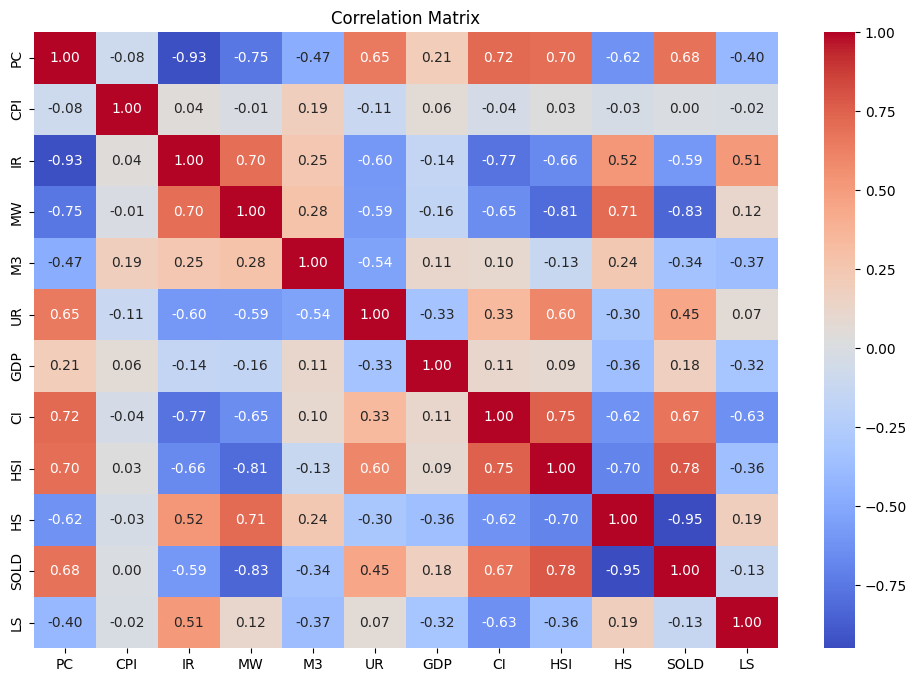

In [15]:
# Focused features and target
features = [
    'CPI', 'IR', 'MW', 'M3', 'UR', 'GDP', 'CI',
    'HSI', 'HS', 'SOLD', 'LS'
]
target = 'PC'  # Set target to 'PC'

# Step 1: Verify the columns exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Step 2: Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Step 3: Handle missing or non-numeric data
        # Remove rows with missing values
        correlation_data = correlation_data.dropna()

        # Automatically encode categorical features if any (no dummies needed for numeric features)
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 4: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Step 5: Focus on correlations with `PC`
        pc_correlation = correlation_matrix[target].sort_values(ascending=False)

        # Display the correlation values
        print("Correlation of features with 'PC':")
        print(pc_correlation)

        # Optional: Visualize the correlation matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title("Correlation Matrix")
        plt.show()

## Correlation with Location

Correlation of features with 'new_price':
new_price                                         1.000000
saleable_area(ft^2)                               0.770753
district_HKIsland Southern District               0.112292
floor                                             0.078863
district_Wan Chai District                        0.074502
YearQuarter_2021Q2                                0.034286
district_Kowloon Yau Tsim Mong District           0.029345
YearQuarter_2021Q1                                0.021720
YearQuarter_2021Q4                                0.017004
YearQuarter_2021Q3                                0.015833
YearQuarter_2020Q3                                0.014155
YearQuarter_2020Q4                                0.013635
YearQuarter_2020Q2                                0.012387
district_Kowloon Kowloon City District            0.009217
YearQuarter_2022Q1                                0.007062
district_Kowloon Sham Shui Po District            0.005065
district_Kowlo

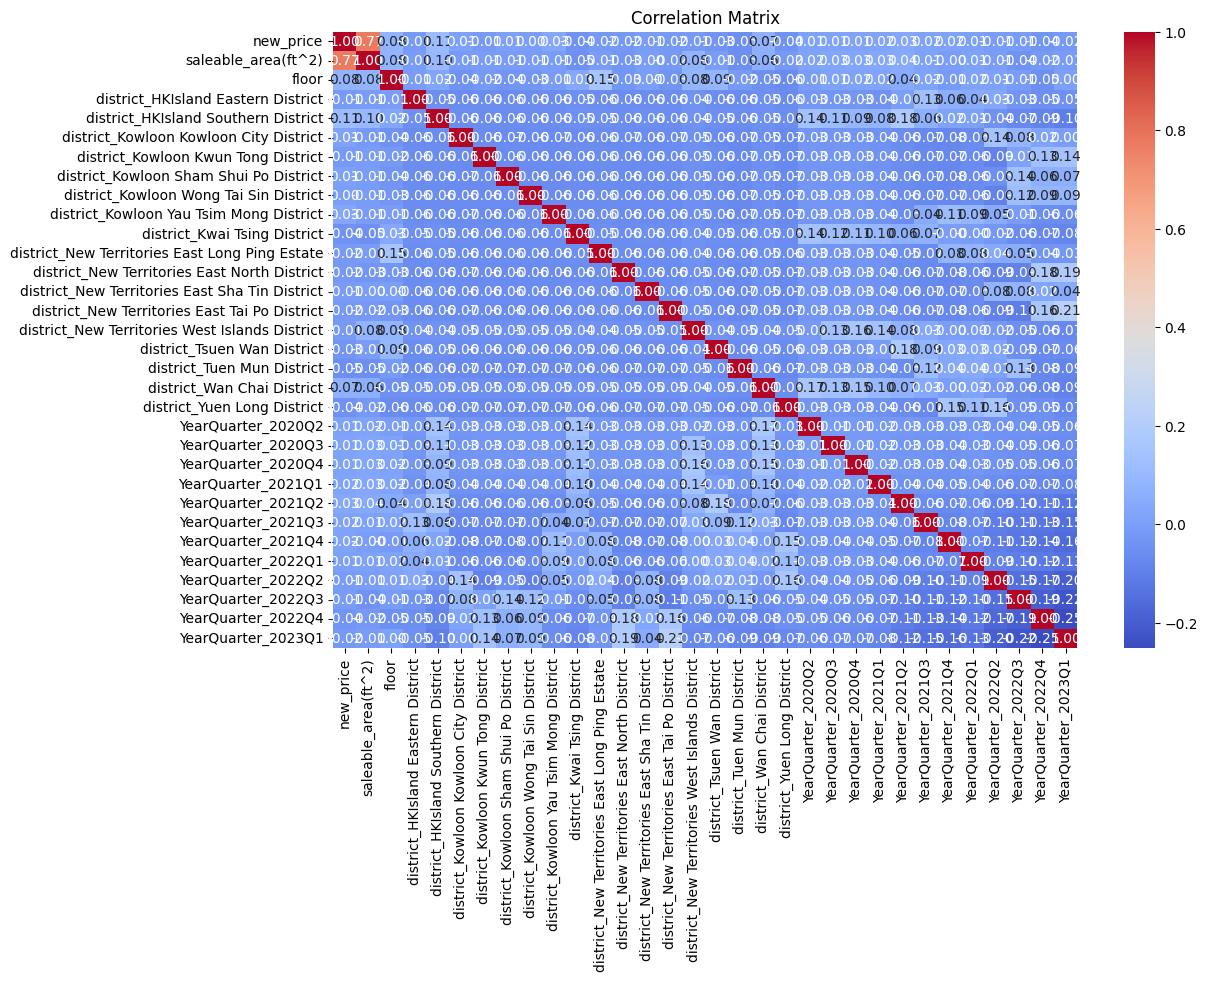

In [16]:

# Focused features and target
features = ['saleable_area(ft^2)', 'district', 'floor', 'YearQuarter',
            'region_HK', 'region_KLN', 'region_NTEast', 'region_NTWest']
target = 'new_price'

# Step 1: Verify the columns exist in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]
if target not in merged_dataset.columns:
    print(f"The target column '{target}' does not exist in the dataset.")
else:
    if not existing_features:
        print("None of the specified feature columns exist in the dataset.")
    else:
        # Step 2: Select relevant columns (target + existing features)
        correlation_data = merged_dataset[[target] + existing_features]

        # Step 3: Handle missing or non-numeric data
        # Remove rows with missing values
        correlation_data = correlation_data.dropna()

        # If districts or other categorical features need encoding, handle them
        correlation_data = pd.get_dummies(correlation_data, drop_first=True)

        # Step 4: Calculate the correlation matrix
        correlation_matrix = correlation_data.corr()

        # Step 5: Focus on correlations with `new_price`
        new_price_correlation = correlation_matrix[target].sort_values(ascending=False)

        # Display the correlation values
        print("Correlation of features with 'new_price':")
        print(new_price_correlation)

        # Optional: Visualize the correlation matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title("Correlation Matrix")
        plt.show()

# FEATURE SELECTION

In [17]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI           

In [18]:
# Import necessary libraries
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Step 1: Define X and y for `new_price` and `PC`
X = merged_dataset.drop(columns=['new_price', 'PC'], errors='ignore')  # Exclude target columns from features
y_new_price = merged_dataset['new_price']  # Target variable for new_price
y_PC = merged_dataset['PC']  # Target variable for PC

# Step 2: Randomly sample 20,000 rows for computational efficiency
sampled_data = X.sample(n=min(20000, len(X)), random_state=42)  # Random sample of 20,000 rows or less if fewer rows exist
sampled_targets_new_price = y_new_price.loc[sampled_data.index]  # Match sampled rows for `new_price`
sampled_targets_PC = y_PC.loc[sampled_data.index]  # Match sampled rows for `PC`

# Step 3: Identify categorical columns in the dataset
categorical_columns = sampled_data.select_dtypes(include=['object']).columns

# Step 4: Use Label Encoding for categorical columns
sampled_data_encoded = sampled_data.copy()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    sampled_data_encoded[col] = le.fit_transform(sampled_data[col].astype(str))
    label_encoders[col] = le

# Step 5a: Exclude for `new_price`
features_to_exclude_new_price = ['floor_height', 'floor_size', 'FormattedDate', 'unit_rate']
sampled_data_filtered_new_price = sampled_data_encoded.drop(columns=features_to_exclude_new_price, errors='ignore')

# Step 5b: Exclude for `PC`
features_to_exclude_PC = ['YearQuarter', 'floor_height', 'region', 'district','floor_size', 'FormattedDate', 'unit_rate']
sampled_data_filtered_PC = sampled_data_encoded.drop(columns=features_to_exclude_PC, errors='ignore')

# Step 6: Compute Mutual Infor for `new_price`
mi_new_price = mutual_info_regression(sampled_data_filtered_new_price, sampled_targets_new_price)

# Step 7: Create DataFrame for results of `new_price`
mi_new_price_df = pd.DataFrame({'Feature': sampled_data_filtered_new_price.columns, 'Mutual Information': mi_new_price})
mi_new_price_df['Target'] = 'new_price'  # Add a column to indicate the target variable
mi_new_price_df = mi_new_price_df.sort_values(by='Mutual Information', ascending=False)  # Sort by Mutual Information

# Step 8: Compute Mutual Information for `PC`
mi_PC = mutual_info_regression(sampled_data_filtered_PC, sampled_targets_PC)

# Step 9: Create DataFrame for results of `PC`
mi_PC_df = pd.DataFrame({'Feature': sampled_data_filtered_PC.columns, 'Mutual Information': mi_PC})
mi_PC_df['Target'] = 'PC'  # Add a column to indicate the target variable
mi_PC_df = mi_PC_df.sort_values(by='Mutual Information', ascending=False)  # Sort by Mutual Information

# Step 10: Print the top 10 features for each target
print("Top 10 features for new_price based on Mutual Information:")
print(mi_new_price_df.head(10).to_string(index=False))  # Print without the index

print("\nTop 10 features for PC based on Mutual Information:")
print(mi_PC_df.head(10).to_string(index=False))  # Print without the index

# Step 11: Save the results to CSV files
mi_new_price_df.to_csv('mi_new_price.csv', index=False)
mi_PC_df.to_csv('mi_PC.csv', index=False)

print("\nMutual Information results saved to 'mi_new_price.csv' and 'mi_PC.csv'.")

Top 10 features for new_price based on Mutual Information:
            Feature  Mutual Information    Target
saleable_area(ft^2)            1.017592 new_price
floor_size_category            0.538034 new_price
              floor            0.291343 new_price
                HSI            0.228146 new_price
                 CI            0.227620 new_price
        YearQuarter            0.166797 new_price
                 IR            0.154349 new_price
                 LS            0.136502 new_price
                 UR            0.128055 new_price
           district            0.115567 new_price

Top 10 features for PC based on Mutual Information:
Feature  Mutual Information Target
    HSI            2.922196     PC
     CI            2.733684     PC
     LS            1.602071     PC
     IR            1.390983     PC
     UR            1.162071     PC
    GDP            0.704558     PC
     M3            0.604843     PC
    CPI            0.584435     PC
   SOLD            0.56

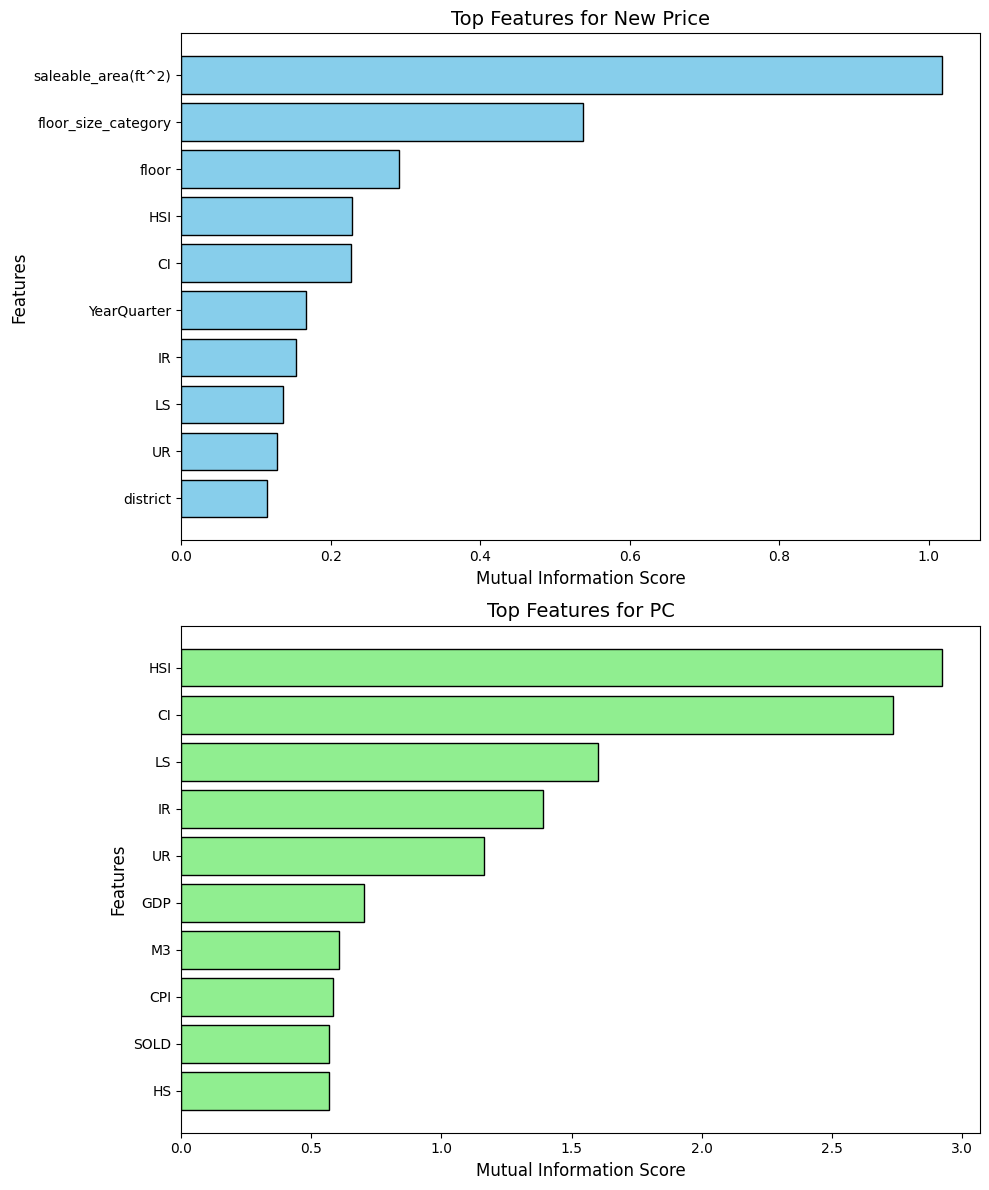

In [19]:

# Step 1: Filter the top 10 features for each target from the mutual information DataFrames
top_features_new_price = mi_new_price_df.head(10)  # Top 10 features for new_price
top_features_PC = mi_PC_df.head(10)  # Top 10 features for PC

# Step 2: Create a single figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # Two rows, one column

# Plot for `new_price`
axes[0].barh(
    top_features_new_price["Feature"],
    top_features_new_price["Mutual Information"],
    color="skyblue",
    edgecolor="black"
)
axes[0].set_xlabel("Mutual Information Score", fontsize=12)
axes[0].set_ylabel("Features", fontsize=12)
axes[0].set_title("Top Features for New Price", fontsize=14)
axes[0].invert_yaxis()  # Highest-ranked feature at the top

# Plot for `PC`
axes[1].barh(
    top_features_PC["Feature"],
    top_features_PC["Mutual Information"],
    color="lightgreen",
    edgecolor="black"
)
axes[1].set_xlabel("Mutual Information Score", fontsize=12)
axes[1].set_ylabel("Features", fontsize=12)
axes[1].set_title("Top Features for PC", fontsize=14)
axes[1].invert_yaxis()  # Highest-ranked feature at the top

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [20]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI           

# MULTICOLLINEARITY and VIF

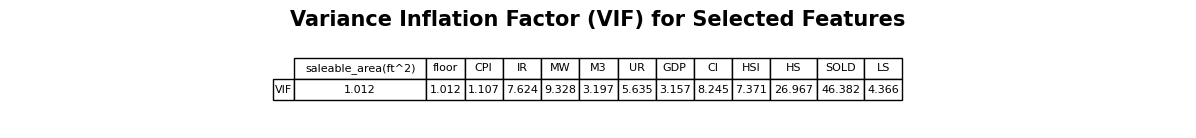

In [21]:
# Import necessary Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Unified list of focused features (excluding "unit_rate")
features = [
    "saleable_area(ft^2)", "floor", "CPI", "IR", "MW", "M3",
    "SD", "UR", "GDP", "CI", "HSI", "LTV", "HS", "SOLD", "PG", "LS"
]

# Step 1: Filter to keep only existing features in the dataset
existing_features = [col for col in features if col in merged_dataset.columns]

# Step 2: Prepare the dataset for VIF calculation
if not existing_features:
    print("None of the specified feature columns exist in the dataset.")
else:
    vif_data = merged_dataset[existing_features].dropna()  # Remove missing values
    vif_data = pd.get_dummies(vif_data, drop_first=True)  # Encode categorical variables if necessary

    # Remove features with zero variance or perfect multicollinearity
    non_constant_features = vif_data.loc[:, (vif_data.var() > 0)]  # Remove zero-variance features
    vif_data_with_constant = add_constant(non_constant_features)  # Add constant for intercept

    # Step 3: Compute VIF and round to 3 decimal places
    vif_results = pd.DataFrame({
        "Feature": vif_data_with_constant.columns,
        "VIF": [
            round(variance_inflation_factor(vif_data_with_constant.values, i), 3)
            for i in range(vif_data_with_constant.shape[1])
        ]
    })

    # Remove the constant row
    vif_results = vif_results[vif_results["Feature"] != "const"]

    # Step 4: Transpose the table for horizontal display
    transposed_vif = vif_results.set_index("Feature").T

    # Step 5: Create the plot for the table
    fig, ax = plt.subplots(figsize=(12, 1))  # Reduce height further for a compact layout
    fig.patch.set_visible(False)
    ax.axis("off")
    ax.axis("tight")

    # Create the table
    table = ax.table(
        cellText=transposed_vif.values,
        colLabels=transposed_vif.columns,
        rowLabels=transposed_vif.index,
        cellLoc="center",
        loc="center"
    )
    table.auto_set_font_size(False)
    table.set_fontsize(8)  # Adjust font size for readability
    table.auto_set_column_width(col=list(range(len(transposed_vif.columns))))

    # Adjust layout to minimize white space
    plt.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99)  # Even tighter margins

    # Title for the table
    ax.set_title(
        "Variance Inflation Factor (VIF) for Selected Features",
        fontsize=15,
        fontweight="bold",
        pad=2  # Reduce padding for title
    )

    # Display the table
    plt.show()

In [22]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI           

# LINEAR REGRESSION CHECKS

In [23]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI           

In [24]:
merged_dataset.columns

Index(['saleable_area(ft^2)', 'unit_rate', 'district', 'floor', 'CPI', 'PC',
       'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD',
       'PG', 'LS', 'FormattedDate', 'new_price', 'YearQuarter', 'region',
       'floor_height', 'floor_size', 'floor_size_category'],
      dtype='object')

Linear Regression for new_price vs saleable_area(ft^2):
Equation: new_price = 40496.52 * saleable_area(ft^2) + -12534073.09
Mean Squared Error: 138885318585882.39
R-squared: 0.59

Linear Regression for new_price vs floor:
Equation: new_price = 122122.97 * floor + 8166870.88
Mean Squared Error: 340004959323464.00
R-squared: 0.01



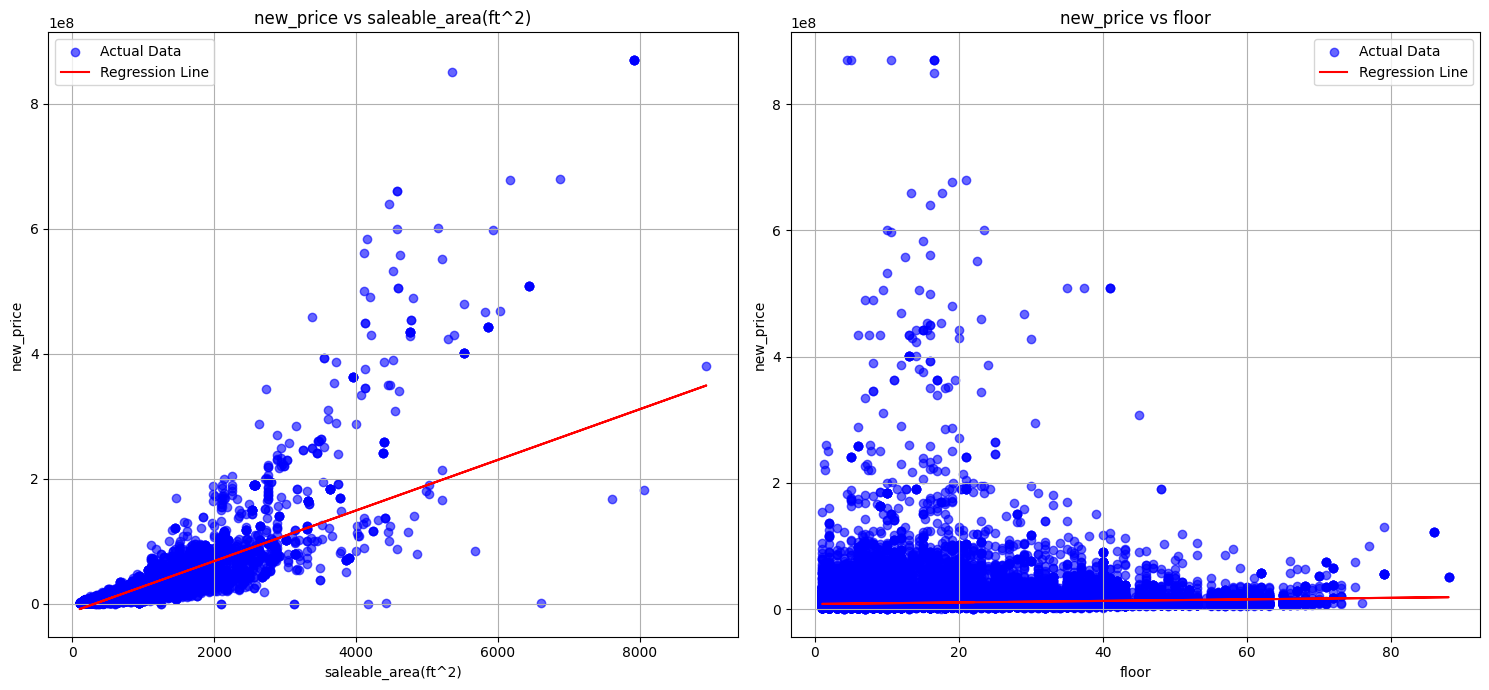

In [25]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Columns to analyze (removed 'unit_rate')
columns_to_analyze = ['saleable_area(ft^2)', 'floor']

# Set up the figure for subplots
plt.figure(figsize=(15, 7))

# Loop through each column and perform linear regression
for i, column in enumerate(columns_to_analyze, 1):
    if column in merged_dataset.columns and 'new_price' in merged_dataset.columns:
        # Remove rows with missing values in the selected columns
        data = merged_dataset[['new_price', column]].dropna()

        # Define predictor (X) and response (y)
        X = data[column].values.reshape(-1, 1)  # Reshape for sklearn
        y = data['new_price'].values

        # Initialize and fit the Linear Regression model
        model = LinearRegression()
        model.fit(X, y)

        # Make predictions
        y_pred = model.predict(X)

        # Coefficients and intercept
        slope = model.coef_[0]
        intercept = model.intercept_

        # Metrics
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        # Print the regression equation and metrics (optional)
        print(f"Linear Regression for new_price vs {column}:")
        print(f"Equation: new_price = {slope:.2f} * {column} + {intercept:.2f}")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R-squared: {r2:.2f}\n")

        # Plot scatter and regression line in a subplot
        plt.subplot(1, 2, i)  # Create a grid layout (1 row, 2 columns)
        plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
        plt.plot(X, y_pred, color='red', label='Regression Line')
        plt.title(f'new_price vs {column}')
        plt.xlabel(column)
        plt.ylabel('new_price')
        plt.legend()
        plt.grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [26]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI           

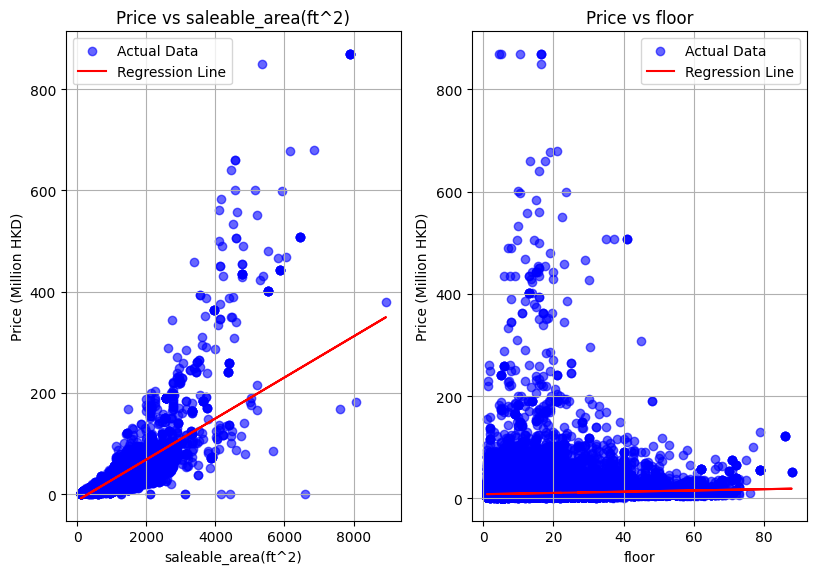

In [27]:

# Define relevant features for new_price
new_price_features = ['saleable_area(ft^2)', 'floor']

# Set up the figure for new_price (half A4 page)
plt.figure(figsize=(8.27, 5.85))  # Half A4 size in landscape

# Loop through new_price features and plot
for i, column in enumerate(new_price_features, 1):
    if column in merged_dataset.columns and 'new_price' in merged_dataset.columns:
        # Prepare the data
        data = merged_dataset[['new_price', column]].dropna()
        X = data[column].values.reshape(-1, 1)
        y = data['new_price'].values / 1_000_000  # Convert to millions of HKD

        # Fit the linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Make predictions
        y_pred = model.predict(X)

        # Plot scatter and regression line
        plt.subplot(1, 2, i)  # 1 row, 2 columns
        plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
        plt.plot(X, y_pred, color='red', label='Regression Line')
        # Change title to "Price"
        plt.title(f'Price vs {column}')
        plt.xlabel(column)
        plt.ylabel('Price (Million HKD)')
        plt.legend()
        plt.grid()

# Adjust layout and display
plt.tight_layout()
plt.show()

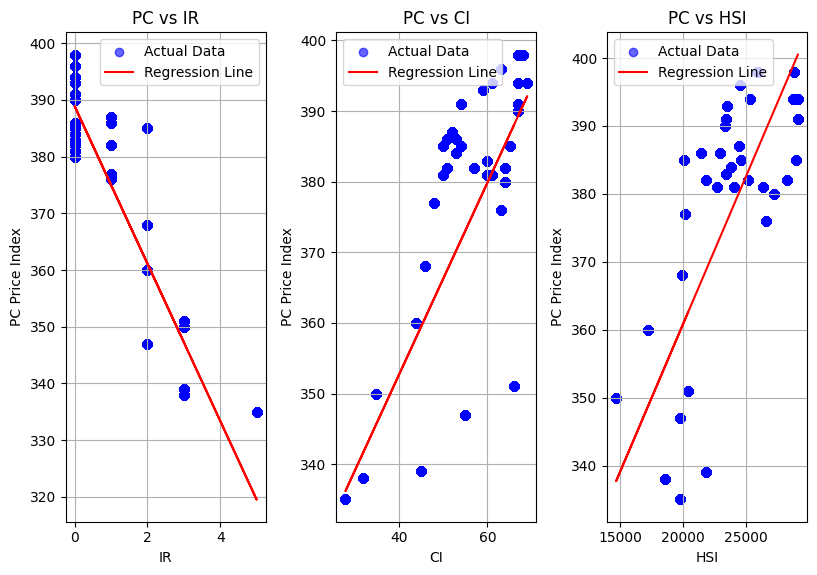

In [28]:
# Define relevant features for PC
pc_features = ['IR', 'CI', 'HSI']

# Set up the figure for PC (half A4 page)
plt.figure(figsize=(8.27, 5.85))  # Half A4 size in landscape

# Loop through PC features and plot
for i, column in enumerate(pc_features, 1):
    if column in merged_dataset.columns and 'PC' in merged_dataset.columns:
        # Prepare the data
        data = merged_dataset[['PC', column]].dropna()
        X = data[column].values.reshape(-1, 1)
        y = data['PC'].values  # Keep PC as the price index

        # Fit the linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Make predictions
        y_pred = model.predict(X)

        # Plot scatter and regression line
        plt.subplot(1, 3, i)  # 1 row, 3 columns
        plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
        plt.plot(X, y_pred, color='red', label='Regression Line')
        plt.title(f'PC vs {column}')
        plt.xlabel(column)
        plt.ylabel('PC Price Index')
        plt.legend()
        plt.grid()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [29]:
# Import Necessary Libraries
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


# Step 1: Exclude variables of type 'object' and 'datetime64[ns]'
numeric_vars = merged_dataset.select_dtypes(exclude=['object', 'datetime64[ns]']).columns.tolist()

# Identify the independent variables for regression (exclude targets)
targets = ['PC', 'new_price']
independent_vars = [var for var in numeric_vars if var not in targets]

# Step 2: Scale the features (independent variables) using StandardScaler
scaler = StandardScaler()
scaled_data = merged_dataset.copy()

# Scale only the independent variables
scaled_data[independent_vars] = scaler.fit_transform(merged_dataset[independent_vars])

# Initialize an empty dictionary to store results for each target
results_dict = {target: [] for target in targets}

# Perform Linear Regression for each target and each independent variable
for target in targets:
    for var in independent_vars:
        # Prepare the data for regression
        X = sm.add_constant(scaled_data[var])  # Add constant for intercept
        y = scaled_data[target]

        # Fit the regression model
        model = sm.OLS(y, X, missing='drop').fit()

        # Extract results
        coefficient = model.params[var]
        p_value = model.pvalues[var]
        r_squared = model.rsquared

        # Append results as a dictionary
        results_dict[target].append({
            'Variable': var,
            'Coefficient': round(coefficient, 4),
            'P-Value': f"{p_value:.4e}",
            'R-Squared': round(r_squared, 4)
        })

# Step 3: Convert results to DataFrames for each target
results_dfs = {target: pd.DataFrame(results_dict[target]) for target in targets}

# Step 4: Print the top 10 features for each target
print("Top 10 Features for PC:")
print(results_dfs['PC'].sort_values(by='R-Squared', ascending=False).head(10))

print("\nTop 10 Features for new_price:")
print(results_dfs['new_price'].sort_values(by='R-Squared', ascending=False).head(10))

Top 10 Features for PC:
   Variable  Coefficient     P-Value  R-Squared
4        IR     -20.5729  0.0000e+00     0.8613
5        MW     -16.7054  0.0000e+00     0.5679
10       CI      15.9381  0.0000e+00     0.5169
11      HSI      15.4238  0.0000e+00     0.4841
14     SOLD      15.1838  0.0000e+00     0.4692
8        UR      14.4660  0.0000e+00     0.4258
13       HS     -13.7058  0.0000e+00     0.3823
6        M3     -10.4787  0.0000e+00     0.2234
16       LS      -8.9697  0.0000e+00     0.1637
9       GDP       4.5774  0.0000e+00     0.0426

Top 10 Features for new_price:
               Variable   Coefficient      P-Value  R-Squared
0   saleable_area(ft^2)  1.425649e+07   0.0000e+00     0.5941
1             unit_rate  1.218577e+07   0.0000e+00     0.4340
2                 floor  1.458714e+06  4.6558e-151     0.0062
5                    MW -1.024620e+06   2.1342e-75     0.0031
4                    IR -9.931362e+05   6.0959e-71     0.0029
11                  HSI  1.003041e+06   2.50

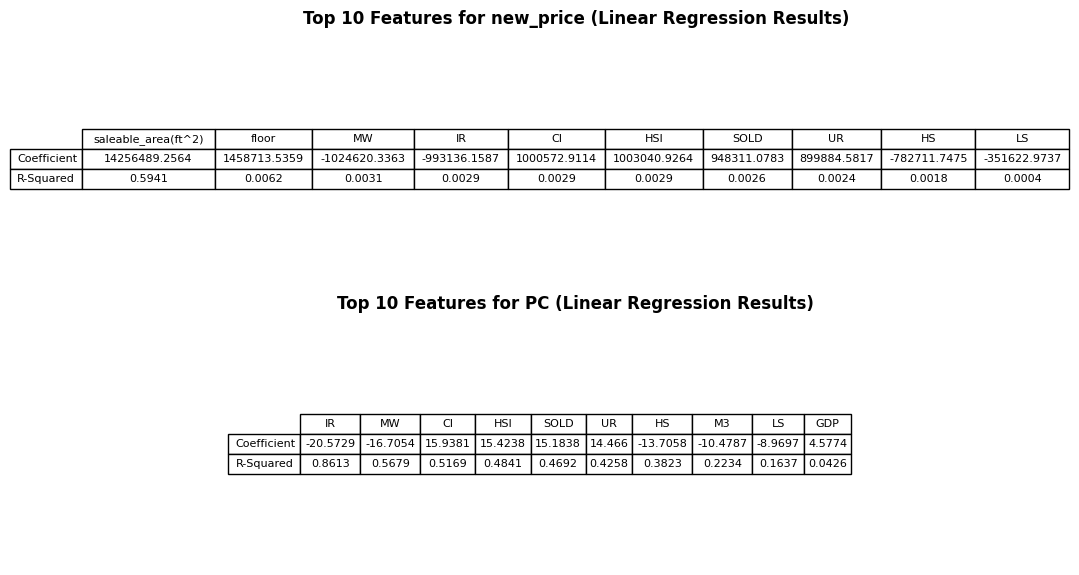

In [30]:

# Step 1: Sort and select the top 10 features for each target, excluding "unit_rate"
top_10_pc = (
    results_dfs['PC']
    .query("Variable != 'unit_rate'")
    .sort_values(by='R-Squared', ascending=False)
    .head(10)
)
top_10_new_price = (
    results_dfs['new_price']
    .query("Variable != 'unit_rate'")
    .sort_values(by='R-Squared', ascending=False)
    .head(10)
)

# Step 2: Transpose the tables, round to 3 decimal places, and remove the "P-Value" row
transposed_pc = top_10_pc.set_index("Variable").T.drop("P-Value").round(3)  # Remove "P-Value" row
transposed_new_price = top_10_new_price.set_index("Variable").T.drop("P-Value").round(3)  # Remove "P-Value" row

# Step 3: Create a plot with both tables
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8.27, 5.85))  # Half A4 size (landscape)

# Function to add a table to an axis
def add_table(ax, transposed_data, title):
    ax.axis("off")  # Turn off the axis
    table = ax.table(
        cellText=transposed_data.values,
        colLabels=transposed_data.columns,
        rowLabels=transposed_data.index,
        cellLoc="center",
        loc="center"
    )
    table.auto_set_font_size(False)
    table.set_fontsize(8)  # Adjust font size for readability
    table.auto_set_column_width(col=list(range(len(transposed_data.columns))))
    ax.set_title(
        title,
        fontsize=12,
        fontweight="bold",
        pad=10
    )

# Add the tables to the subplots in the desired order
add_table(axes[0], transposed_new_price, "Top 10 Features for new_price (Linear Regression Results)")
add_table(axes[1], transposed_pc, "Top 10 Features for PC (Linear Regression Results)")

# Adjust layout to ensure both tables fit well
plt.tight_layout()

# Show the plot
plt.show()

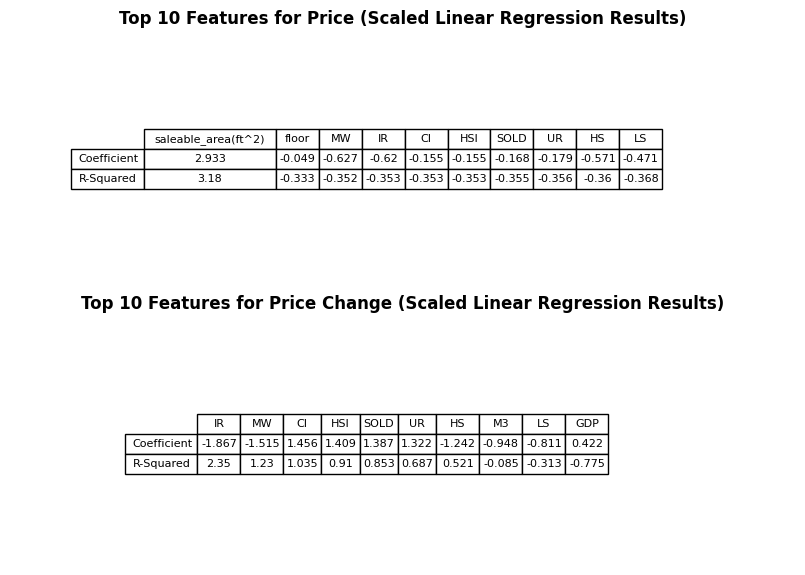

In [31]:

# Step 0: Extract numeric columns for scaling
# Assuming results_dfs['PC'] and results_dfs['new_price'] are DataFrames
# Drop non-numeric columns and "Variable", but keep them for later reattachment
numeric_pc = results_dfs['PC'].drop(columns=["Variable", "P-Value"])
numeric_new_price = results_dfs['new_price'].drop(columns=["Variable", "P-Value"])

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
scaled_features_pc = scaler.fit_transform(numeric_pc)  # Scaled numeric data
scaled_features_new_price = scaler.fit_transform(numeric_new_price)

# Recreate scaled DataFrames with the same column names
scaled_results_pc = pd.DataFrame(
    scaled_features_pc, columns=numeric_pc.columns
)
scaled_results_pc.insert(0, "Variable", results_dfs['PC']["Variable"])  # Reattach "Variable"

scaled_results_new_price = pd.DataFrame(
    scaled_features_new_price, columns=numeric_new_price.columns
)
scaled_results_new_price.insert(0, "Variable", results_dfs['new_price']["Variable"])  # Reattach "Variable"

# Step 1: Sort and select the top 10 features for each target, excluding "unit_rate"
top_10_pc = (
    scaled_results_pc
    .query("Variable != 'unit_rate'")
    .sort_values(by='R-Squared', ascending=False)
    .head(10)
)
top_10_new_price = (
    scaled_results_new_price
    .query("Variable != 'unit_rate'")
    .sort_values(by='R-Squared', ascending=False)
    .head(10)
)

# Step 2: Transpose the tables, round to 3 decimal places, and remove the "P-Value" row
transposed_pc = top_10_pc.set_index("Variable").T.drop("P-Value", errors='ignore').round(3)  # Remove "P-Value" row
transposed_new_price = top_10_new_price.set_index("Variable").T.drop("P-Value", errors='ignore').round(3)  # Remove "P-Value" row

# Step 3: Create a plot with both tables
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8.27, 5.85))  # Half A4 size (landscape)

# Function to add a table to an axis
def add_table(ax, transposed_data, title):
    ax.axis("off")  # Turn off the axis
    table = ax.table(
        cellText=transposed_data.values,
        colLabels=transposed_data.columns,
        rowLabels=transposed_data.index,
        cellLoc="center",
        loc="center"
    )
    table.auto_set_font_size(False)
    table.set_fontsize(8)  # Adjust font size for readability
    table.auto_set_column_width(col=list(range(len(transposed_data.columns))))
    ax.set_title(
        title,
        fontsize=12,
        fontweight="bold",
        pad=10
    )

# Add the tables to the subplots in the desired order
add_table(axes[0], transposed_new_price, "Top 10 Features for Price (Scaled Linear Regression Results)")
add_table(axes[1], transposed_pc, "Top 10 Features for Price Change (Scaled Linear Regression Results)")

# Adjust layout to ensure both tables fit well
plt.tight_layout()

# Show the plot
plt.show()


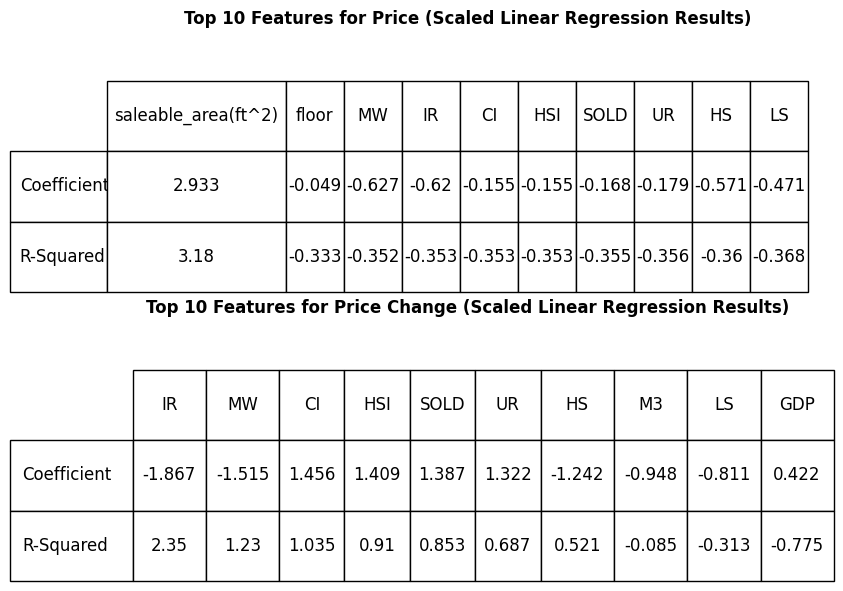

In [32]:

# Step 0: Extract numeric columns for scaling
numeric_pc = results_dfs['PC'].drop(columns=["Variable", "P-Value"])
numeric_new_price = results_dfs['new_price'].drop(columns=["Variable", "P-Value"])

# Apply StandardScaler to numeric columns
scaler = StandardScaler()
scaled_features_pc = scaler.fit_transform(numeric_pc)  # Scaled numeric data
scaled_features_new_price = scaler.fit_transform(numeric_new_price)

# Recreate scaled DataFrames with the same column names
scaled_results_pc = pd.DataFrame(
    scaled_features_pc, columns=numeric_pc.columns
)
scaled_results_pc.insert(0, "Variable", results_dfs['PC']["Variable"])  # Reattach "Variable"

scaled_results_new_price = pd.DataFrame(
    scaled_features_new_price, columns=numeric_new_price.columns
)
scaled_results_new_price.insert(0, "Variable", results_dfs['new_price']["Variable"])  # Reattach "Variable"

# Step 1: Sort and select the top 10 features for each target, excluding "unit_rate"
top_10_pc = (
    scaled_results_pc
    .query("Variable != 'unit_rate'")
    .sort_values(by='R-Squared', ascending=False)
    .head(10)
)
top_10_new_price = (
    scaled_results_new_price
    .query("Variable != 'unit_rate'")
    .sort_values(by='R-Squared', ascending=False)
    .head(10)
)

# Step 2: Transpose the tables, round to 3 decimal places, and remove the "P-Value" row
transposed_pc = top_10_pc.set_index("Variable").T.drop("P-Value", errors='ignore').round(3)  # Remove "P-Value" row
transposed_new_price = top_10_new_price.set_index("Variable").T.drop("P-Value", errors='ignore').round(3)  # Remove "P-Value" row

# Step 3: Create a plot with both tables
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8.27, 5.85))  # Half A4 size (landscape)

# Function to add a table to an axis
def add_table(ax, transposed_data, title):
    ax.axis("off")  # Turn off the axis
    ax.set_title(
        title,
        fontsize=12,
        fontweight="bold",
        pad=2  # Minimal padding between the title and the table
    )
    table = ax.table(
        cellText=transposed_data.values,
        colLabels=transposed_data.columns,
        rowLabels=transposed_data.index,
        cellLoc="center",
        loc="center",
        bbox=[0.0, 0.0, 1.0, 0.8]  # Adjust the table's vertical position and size
    )
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Increase font size by 50% (original size was 8)
    table.auto_set_column_width(col=list(range(len(transposed_data.columns))))

# Add the tables to the subplots in the desired order
add_table(axes[0], transposed_new_price, "Top 10 Features for Price (Scaled Linear Regression Results)")
add_table(axes[1], transposed_pc, "Top 10 Features for Price Change (Scaled Linear Regression Results)")

# Adjust layout to further reduce unnecessary spacing
plt.tight_layout(pad=0.5)  # Minimize white space between subplots and surrounding areas

# Show the plot
plt.show()

In [34]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI           

Columns in merged_dataset: Index(['saleable_area(ft^2)', 'unit_rate', 'district', 'floor', 'CPI', 'PC',
       'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD',
       'PG', 'LS', 'FormattedDate', 'new_price', 'YearQuarter', 'region',
       'floor_height', 'floor_size', 'floor_size_category',
       'district_encoded'],
      dtype='object')
Performing target encoding for the 'district' column...
Target encoding complete. 'district_encoded' column added, but 'district' is preserved.


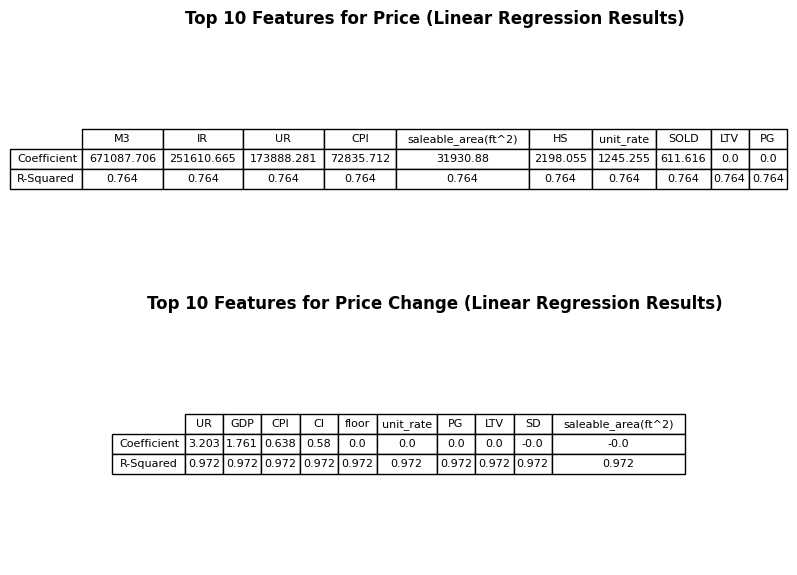

In [36]:

# Step 0: Verify the dataset
print("Columns in merged_dataset:", merged_dataset.columns)

# Ensure there are no leading or trailing spaces in column names
merged_dataset.columns = merged_dataset.columns.str.strip()

# Check if the `district` column exists
if 'district' not in merged_dataset.columns:
    raise KeyError("Error: 'district' column is missing from merged_dataset.")

# Step 1: Target Encoding for the `district` column (specific to `new_price`)
print("Performing target encoding for the 'district' column...")
district_target_mean = merged_dataset.groupby('district')['new_price'].mean()  # Calculate mean price for each district
merged_dataset['district_encoded'] = merged_dataset['district'].map(district_target_mean)  # Add target-encoded column

# The original `district` column is preserved
print("Target encoding complete. 'district_encoded' column added, but 'district' is preserved.")

# Step 2: Prepare features and targets for regression
# Define features for `price` regression (include `district_encoded`, exclude `district` for numeric regression)
features_price = [
    col for col in merged_dataset.columns
    if col not in ['new_price', 'PC', 'FormattedDate', 'YearQuarter', 'district']  # Exclude target & non-numeric columns
]

# Define features for `PC` regression (exclude `district_encoded`)
features_pc = [
    col for col in merged_dataset.columns
    if col not in ['new_price', 'PC', 'FormattedDate', 'YearQuarter', 'district', 'district_encoded']
]

# Feature matrices
X_price = merged_dataset[features_price].select_dtypes(include=['float64', 'int64'])  # Only numeric columns
X_pc = merged_dataset[features_pc].select_dtypes(include=['float64', 'int64'])  # Only numeric columns

# Target variables
y_price = merged_dataset['new_price']  # Target for price
y_pc = merged_dataset['PC']  # Target for price change

# Step 3: Perform Linear Regression for `new_price`
lr_price = LinearRegression()
lr_price.fit(X_price, y_price)

# Extract coefficients and R-squared values
coefficients_price = lr_price.coef_
r_squared_price = lr_price.score(X_price, y_price)

# Step 4: Perform Linear Regression for `PC`
lr_pc = LinearRegression()
lr_pc.fit(X_pc, y_pc)

# Extract coefficients and R-squared values
coefficients_pc = lr_pc.coef_
r_squared_pc = lr_pc.score(X_pc, y_pc)

# Step 5: Create DataFrames for top features
# Combine feature names, coefficients, and R-squared values
results_price = pd.DataFrame({
    'Variable': X_price.columns,
    'Coefficient': coefficients_price,
    'R-Squared': [r_squared_price] * len(X_price.columns)
}).sort_values(by='Coefficient', ascending=False).head(10)

results_pc = pd.DataFrame({
    'Variable': X_pc.columns,
    'Coefficient': coefficients_pc,
    'R-Squared': [r_squared_pc] * len(X_pc.columns)
}).sort_values(by='Coefficient', ascending=False).head(10)

# Transpose the tables for plotting
transposed_price = results_price.set_index("Variable").T.round(3)
transposed_pc = results_pc.set_index("Variable").T.round(3)

# Step 6: Plot the results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8.27, 5.85))  # Half A4 size (landscape)

# Function to add a table to an axis
def add_table(ax, transposed_data, title):
    ax.axis("off")  # Turn off the axis
    table = ax.table(
        cellText=transposed_data.values,
        colLabels=transposed_data.columns,
        rowLabels=transposed_data.index,
        cellLoc="center",
        loc="center"
    )
    table.auto_set_font_size(False)
    table.set_fontsize(8)  # Adjust font size for readability
    table.auto_set_column_width(col=list(range(len(transposed_data.columns))))
    ax.set_title(
        title,
        fontsize=12,
        fontweight="bold",
        pad=10
    )

# Add tables for `new_price` and `PC`
add_table(axes[0], transposed_price, "Top 10 Features for Price (Linear Regression Results)")
add_table(axes[1], transposed_pc, "Top 10 Features for Price Change (Linear Regression Results)")

# Adjust layout
plt.tight_layout()
plt.show()


# ONE HOT ENCODING

In [37]:
merged_dataset.shape

(109851, 27)

In [38]:
# One-hot encoding for district
encoded_district = pd.get_dummies(merged_dataset['district'], prefix='district')

# Merge the one-hot encoded columns with the original dataset
merged_dataset = pd.concat([merged_dataset, encoded_district], axis=1)

# Explicitly set one-hot encoded columns to int64
merged_dataset[encoded_district.columns] = encoded_district.astype('int64')


# Display the updated column names
print("Columns in the updated dataset:")
print(merged_dataset.columns)

Columns in the updated dataset:
Index(['saleable_area(ft^2)', 'unit_rate', 'district', 'floor', 'CPI', 'PC',
       'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD',
       'PG', 'LS', 'FormattedDate', 'new_price', 'YearQuarter', 'region',
       'floor_height', 'floor_size', 'floor_size_category', 'district_encoded',
       'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'distr

In [39]:
# One-hot encoding for floor_size
encoded_floor_size = pd.get_dummies(merged_dataset['floor_size'], prefix='floor_size')

# Merge the one-hot encoded columns with the original dataset
merged_dataset = pd.concat([merged_dataset, encoded_floor_size], axis=1)

# Explicitly set one-hot encoded columns to int64
merged_dataset[encoded_floor_size.columns] = encoded_floor_size.astype('int64')


# Display the updated column names
print("Columns in the updated dataset:")
print(merged_dataset.columns)

Columns in the updated dataset:
Index(['saleable_area(ft^2)', 'unit_rate', 'district', 'floor', 'CPI', 'PC',
       'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD',
       'PG', 'LS', 'FormattedDate', 'new_price', 'YearQuarter', 'region',
       'floor_height', 'floor_size', 'floor_size_category', 'district_encoded',
       'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'distr

In [40]:
# One-hot encoding for YearQuarter
encoded_YearQuarter = pd.get_dummies(merged_dataset['YearQuarter'], prefix='YearQuarter')

# Merge the one-hot encoded columns with the original dataset
merged_dataset = pd.concat([merged_dataset, encoded_YearQuarter], axis=1)

# Explicitly set one-hot encoded columns to int64
merged_dataset[encoded_YearQuarter.columns] = encoded_YearQuarter.astype('int64')


# Display the updated column names
print("Columns in the updated dataset:")
print(merged_dataset.columns)

Columns in the updated dataset:
Index(['saleable_area(ft^2)', 'unit_rate', 'district', 'floor', 'CPI', 'PC',
       'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD',
       'PG', 'LS', 'FormattedDate', 'new_price', 'YearQuarter', 'region',
       'floor_height', 'floor_size', 'floor_size_category', 'district_encoded',
       'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'distr

In [41]:
# One-hot encoding for floor height
encoded_floor_height = pd.get_dummies(merged_dataset['floor_height'], prefix='floor_height')

# Merge the one-hot encoded columns with the original dataset
merged_dataset = pd.concat([merged_dataset, encoded_floor_height], axis=1)

# Explicitly set one-hot encoded columns to int64
merged_dataset[encoded_floor_height.columns] = encoded_floor_height.astype('int64')

# Do NOT drop the original 'floor_height' column (keep it in the dataset)


# Display the updated column names
print("Columns in the updated dataset:")
print(merged_dataset.columns)

Columns in the updated dataset:
Index(['saleable_area(ft^2)', 'unit_rate', 'district', 'floor', 'CPI', 'PC',
       'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD',
       'PG', 'LS', 'FormattedDate', 'new_price', 'YearQuarter', 'region',
       'floor_height', 'floor_size', 'floor_size_category', 'district_encoded',
       'district_Central and Western District',
       'district_HKIsland Eastern District',
       'district_HKIsland Southern District',
       'district_Kowloon Kowloon City District',
       'district_Kowloon Kwun Tong District',
       'district_Kowloon Sham Shui Po District',
       'district_Kowloon Wong Tai Sin District',
       'district_Kowloon Yau Tsim Mong District',
       'district_Kwai Tsing District',
       'district_New Territories East Long Ping Estate',
       'district_New Territories East North District',
       'district_New Territories East Sha Tin District',
       'district_New Territories East Tai Po District',
       'distr

In [42]:
merged_dataset.shape

(109851, 84)

# CLEANING / TRANSFORMING THE MERGED DATA SET

In [43]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 84 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   saleable_area(ft^2)                             109851 non-null  int64         
 1   unit_rate                                       109851 non-null  int64         
 2   district                                        109851 non-null  object        
 3   floor                                           109851 non-null  float64       
 4   CPI                                             109851 non-null  int64         
 5   PC                                              109851 non-null  int64         
 6   IR                                              109851 non-null  int64         
 7   MW                                              109851 non-null  int64         
 8   M3                                

In [44]:
# Step 1: Print the initial shape of the dataset
print("Initial dataset shape:", merged_dataset.shape)

# Step 2: Remove data from incomplete earlier periods (2020Q1 to 2020Q4)
if 'YearQuarter' in merged_dataset.columns:
    merged_dataset = merged_dataset[merged_dataset['YearQuarter'] > '2020Q4']

# Step 3: Drop districts with sparse data (e.g., Kowloon City and Wong Tai Sin)
sparse_districts = ['Kowloon City District', 'Wong Tai Sin District']
if 'district' in merged_dataset.columns:
    merged_dataset = merged_dataset[~merged_dataset['district'].isin(sparse_districts)]

# Step 4: Drop all object-type columns
merged_dataset = merged_dataset.select_dtypes(exclude=["object"])

# Step 5: Print the info of the cleaned dataset
print("Info of the dataset after dropping object columns:")
print(merged_dataset.info())

Initial dataset shape: (109851, 84)
Info of the dataset after dropping object columns:
<class 'pandas.core.frame.DataFrame'>
Index: 105141 entries, 0 to 109850
Data columns (total 78 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   saleable_area(ft^2)                             105141 non-null  int64         
 1   unit_rate                                       105141 non-null  int64         
 2   floor                                           105141 non-null  float64       
 3   CPI                                             105141 non-null  int64         
 4   PC                                              105141 non-null  int64         
 5   IR                                              105141 non-null  int64         
 6   MW                                              105141 non-null  int64         
 7   M3                                   

In [45]:
# Import necessary libraries
from scipy.stats import zscore

# Step 1: Print the initial shape of the dataset
print("Initial dataset shape:", merged_dataset.shape)

# Step 2: Remove data from incomplete earlier periods (2020Q1 to 2020Q4)
if 'YearQuarter' in merged_dataset.columns:
    merged_dataset = merged_dataset[merged_dataset['YearQuarter'] > '2020Q4']

# Step 3: Drop districts with sparse data (e.g., Kowloon City and Wong Tai Sin)
sparse_districts = ['Kowloon City District', 'Wong Tai Sin District']
if 'district' in merged_dataset.columns:
    merged_dataset = merged_dataset[~merged_dataset['district'].isin(sparse_districts)]

# Step 4: Handle overrepresentation by downsampling Hong Kong Island districts
hk_island_districts = [
    'Central and Western District',
    'Eastern District',
    'Southern District',
    'Wan Chai District'
]

if 'district' in merged_dataset.columns:
    # Downsample to balance Hong Kong Island districts
    for district in hk_island_districts:
        district_rows = merged_dataset[merged_dataset['district'] == district]
        max_rows = int(0.05 * len(merged_dataset))  # Set threshold (e.g., 5% of total rows)
        if len(district_rows) > max_rows:
            merged_dataset = merged_dataset.drop(district_rows.index[max_rows:])

# Step 5: Drop all remaining object-type columns except 'FormattedDate'
# Retain 'FormattedDate' for time-based feature extraction later
non_time_object_cols = merged_dataset.select_dtypes(include=["object"]).columns.difference(['FormattedDate'])
merged_dataset = merged_dataset.drop(columns=non_time_object_cols)

# Step 6: Print the info of the cleaned dataset
print("Info of the dataset after dropping object columns:")
print(merged_dataset.info())

# Step 7: Remove rows with invalid prices (prices ≤ 0)
merged_dataset = merged_dataset[merged_dataset['new_price'] > 0]

# Step 8: Remove extreme outliers using the IQR method
def handle_outliers_iqr(df, features, threshold=1.5):
    """
    Caps outliers using the IQR method.
    """
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

numerical_features = ['unit_rate', 'new_price', 'saleable_area(ft^2)']  # Add other numerical features if needed
merged_dataset = handle_outliers_iqr(merged_dataset, numerical_features)

# Step 9: Remove rows with saleable area ≤ 0 (invalid entries)
merged_dataset = merged_dataset[merged_dataset['saleable_area(ft^2)'] > 0]

# Step 10: Remove properties with new_price outside the range of 1 to 20 million
merged_dataset = merged_dataset[(merged_dataset['new_price'] >= 1_000_000) &  # At least 1 million
                                 (merged_dataset['new_price'] <= 20_000_000)]  # At most 20 million

# Step 11: Normalize skewed features using log1p
# Remove "unit_rate" and substitute "new_price" for normalization
skewed_features = ['new_price', 'saleable_area(ft^2)']
for col in skewed_features:
    if (merged_dataset[col] > 0).all():  # Ensure no negative or zero values
        merged_dataset[col] = np.log1p(merged_dataset[col])

# Step 12: Extract time-based features for LSTM
if 'FormattedDate' in merged_dataset.columns:
    merged_dataset['Year'] = merged_dataset['FormattedDate'].dt.year
    merged_dataset['Month'] = merged_dataset['FormattedDate'].dt.month
    merged_dataset['Day'] = merged_dataset['FormattedDate'].dt.day
    merged_dataset['DayOfWeek'] = merged_dataset['FormattedDate'].dt.dayofweek
    merged_dataset['ElapsedDays'] = (merged_dataset['FormattedDate'] - merged_dataset['FormattedDate'].min()).dt.days

# Step 13: Sort by time-stamp for LSTM models
if 'FormattedDate' in merged_dataset.columns:
    merged_dataset = merged_dataset.sort_values(by='FormattedDate')

# Step 14: Optionally drop the original time-stamp column
# Retain the time-stamp if needed for interpretability or debugging
merged_dataset = merged_dataset.drop(columns=['FormattedDate'])

# Step 15: Address multicollinearity by dropping highly correlated features
def reduce_multicollinearity(df, target_columns, threshold=0.9):
    """
    Removes highly correlated features based on a correlation threshold.
    Keeps specified target columns and ensures index alignment.
    """
    # Separate target columns from the rest of the dataset
    target_df = df[target_columns]
    feature_df = df.drop(columns=target_columns)

    # Compute the correlation matrix for the features
    corr_matrix = feature_df.corr().abs()

    # Identify the upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find columns with correlation greater than the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Drop the identified columns
    reduced_df = feature_df.drop(columns=to_drop)

    # Combine the reduced features with the target columns and return
    return pd.concat([reduced_df, target_df], axis=1)

merged_dataset = reduce_multicollinearity(merged_dataset, target_columns=["new_price", "PC"], threshold=0.9)

# Step 16: Remove constant features (features with zero standard deviation)
def remove_constant_features(df):
    """
    Removes constant features (features with zero standard deviation).
    """
    constant_features = [col for col in df.columns if df[col].std() == 0]
    if constant_features:
        print(f"Removing constant features: {constant_features}")
    return df.drop(columns=constant_features)

merged_dataset = remove_constant_features(merged_dataset)

# Step 17: Scale the dataset
def scale_features(df):
    """
    Scales all numeric features in the dataset to have zero mean and unit variance.
    Non-numeric columns are excluded from scaling.
    """
    # Select only numeric columns for scaling
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    non_numeric_cols = df.select_dtypes(exclude=["float64", "int64"]).columns

    # Scale numeric features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[numeric_cols])

    # Create a scaled DataFrame for numeric data
    scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols, index=df.index)

    # Combine scaled numeric data with non-numeric data (if any)
    final_df = pd.concat([scaled_df, df[non_numeric_cols]], axis=1)

    return final_df

merged_dataset = scale_features(merged_dataset)

# Print the feature means and standard deviations after scaling
numeric_cols = merged_dataset.select_dtypes(include=["float64", "int64"]).columns
print("Feature means after scaling:", merged_dataset[numeric_cols].mean())
print("Feature std deviations after scaling:", merged_dataset[numeric_cols].std())

# Final dataset shape
print("Final dataset shape after scaling:", merged_dataset.shape)

Initial dataset shape: (105141, 78)
Info of the dataset after dropping object columns:
<class 'pandas.core.frame.DataFrame'>
Index: 105141 entries, 0 to 109850
Data columns (total 78 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   saleable_area(ft^2)                             105141 non-null  int64         
 1   unit_rate                                       105141 non-null  int64         
 2   floor                                           105141 non-null  float64       
 3   CPI                                             105141 non-null  int64         
 4   PC                                              105141 non-null  int64         
 5   IR                                              105141 non-null  int64         
 6   MW                                              105141 non-null  int64         
 7   M3                                   

# FINAL MERGED DATASET AFTER ENCODING READY FOR ML

Text(0.5, 0.01, 'Total Rows: 105114 | Total Columns: 72')

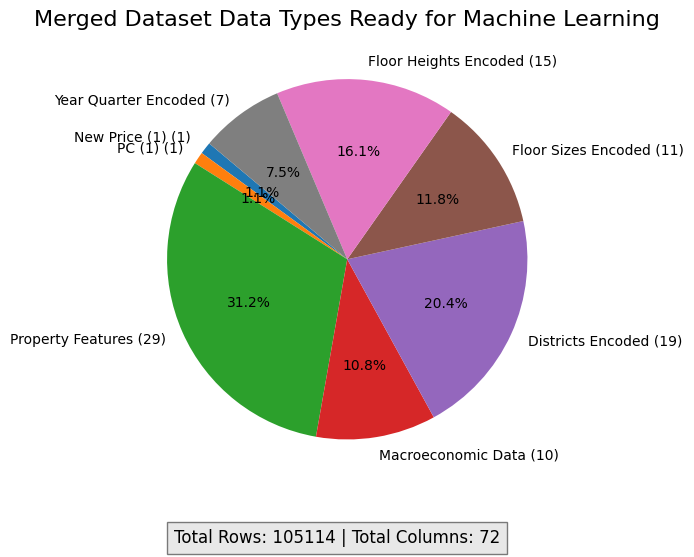

In [46]:

# Dynamically calculate column groups based on the cleaned dataset
property_features = [col for col in merged_dataset.columns if "area" in col or "unit_rate" in col or "floor" in col]
macroeconomic_data = ["CPI", "IR", "MW", "M3", "SD", "UR", "GDP", "CI", "HSI", "LTV", "HS", "PG", "LS"]
new_price = ["new_price"] if "new_price" in merged_dataset.columns else []
pc = ["PC"] if "PC" in merged_dataset.columns else []
districts_encoded = [col for col in merged_dataset.columns if col.startswith("district_")]
floor_sizes_encoded = [col for col in merged_dataset.columns if col.startswith("floor_size_")]
floor_heights_encoded = [col for col in merged_dataset.columns if col.startswith("floor_height_")]
year_quarter_encoded = [col for col in merged_dataset.columns if col.startswith("YearQuarter_")]

# Count the number of columns in each group
groups = {
    "New Price (1)": len(new_price),
    "PC (1)": len(pc),
    "Property Features": len(property_features),
    "Macroeconomic Data": len([col for col in macroeconomic_data if col in merged_dataset.columns]),
    "Districts Encoded": len(districts_encoded),
    "Floor Sizes Encoded": len(floor_sizes_encoded),
    "Floor Heights Encoded": len(floor_heights_encoded),
    "Year Quarter Encoded": len(year_quarter_encoded)
}

# Calculate totals
total_columns = merged_dataset.shape[1]  # Dynamically get the actual number of columns
total_rows = merged_dataset.shape[0]  # Dynamically get the actual number of rows

# Create the pie chart
plt.figure(figsize=(8.27, 5.85))  # Half an A4 page size (width x height in inches)
colors = plt.cm.tab10.colors  # Use a predefined color palette
plt.pie(
    groups.values(),
    labels=[f"{key} ({value})" for key, value in groups.items()],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title("Merged Dataset Data Types Ready for Machine Learning", fontsize=16)

# Add total rows and columns at the bottom
plt.figtext(
    0.5,
    0.01,
    f"Total Rows: {total_rows} | Total Columns: {total_columns}",
    ha="center",
    fontsize=12,
    bbox={"facecolor": "lightgrey", "alpha": 0.5, "pad": 5}
)

#

# SAVING THE CLEANED AND PROCESSED MERGED DATASET

In [47]:
merged_dataset.shape

(105114, 72)

In [48]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105114 entries, 87135 to 76927
Data columns (total 72 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   saleable_area(ft^2)                             105114 non-null  float64
 1   unit_rate                                       105114 non-null  float64
 2   floor                                           105114 non-null  float64
 3   CPI                                             105114 non-null  float64
 4   IR                                              105114 non-null  float64
 5   MW                                              105114 non-null  float64
 6   M3                                              105114 non-null  float64
 7   UR                                              105114 non-null  float64
 8   GDP                                             105114 non-null  float64
 9   CI                          

In [49]:
# Save the merged dataset to a new CSV file
merged_dataset.to_csv('Std_Datasetv4.csv', index=False)

In [50]:
# Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv4.csv'

# Save the file
merged_dataset.to_csv(file_path, index=False)

# Verify if the file exists
if os.path.exists(file_path):
    print(f"File 'Std_Datasetv4.csv' has been saved successfully!")
    print(f"Full file path: {file_path}")
else:
    print(f"File 'Std_Datasetv4.csv' was not found in the directory!")

# Optionally unmount and remount Google Drive
drive.flush_and_unmount()
print("Drive unmounted. Please refresh Google Drive and remount if necessary.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File 'Std_Datasetv4.csv' has been saved successfully!
Full file path: /content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv4.csv
Drive unmounted. Please refresh Google Drive and remount if necessary.
